# Loading librairies

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import xgboost as xgb

In [13]:
sns.set_style("whitegrid")
sns.set_palette("crest")

# Loading data

In [3]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# Exploratory Data Analysis

## General information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


## Statistical summary

In [5]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


## Missing values

In [6]:
missing_values = df.isnull().sum()
print(missing_values)

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


# Categorical Features Analysis

## Distribution of HomePlanet by Transported

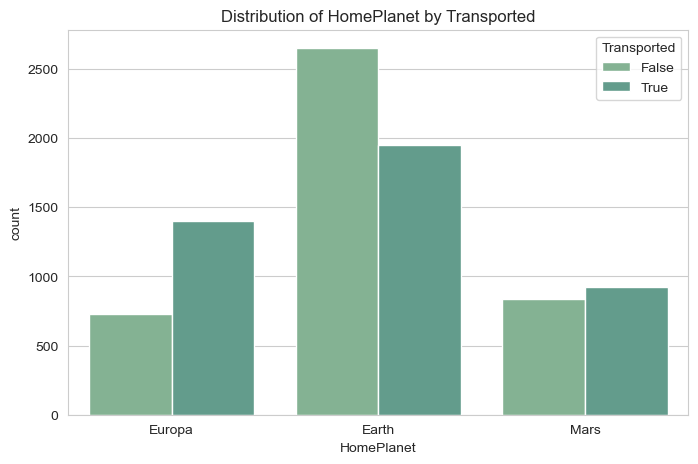

In [15]:
plt.figure(figsize=(8, 5))
sns.countplot(x='HomePlanet', hue='Transported', data=df)
plt.title("Distribution of HomePlanet by Transported")
plt.show()


## Distribution of CryoSleep by Transported

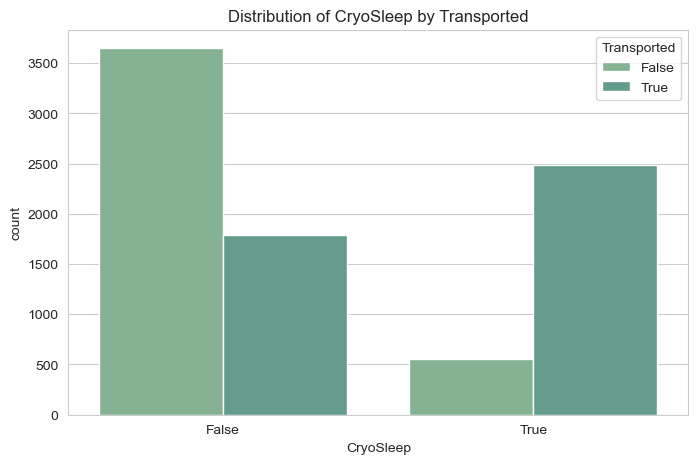

In [17]:
plt.figure(figsize = (8, 5))

sns.countplot(data = df,
              x= 'CryoSleep',
              hue = 'Transported')
plt.title("Distribution of CryoSleep by Transported")
plt.show()

## Distribution of Cabin by Transported

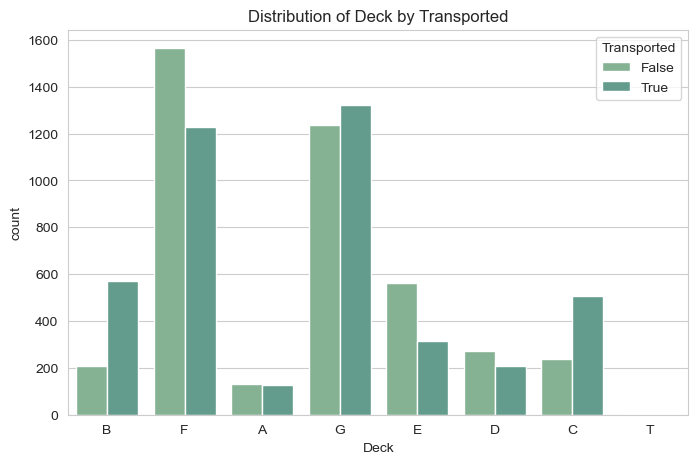

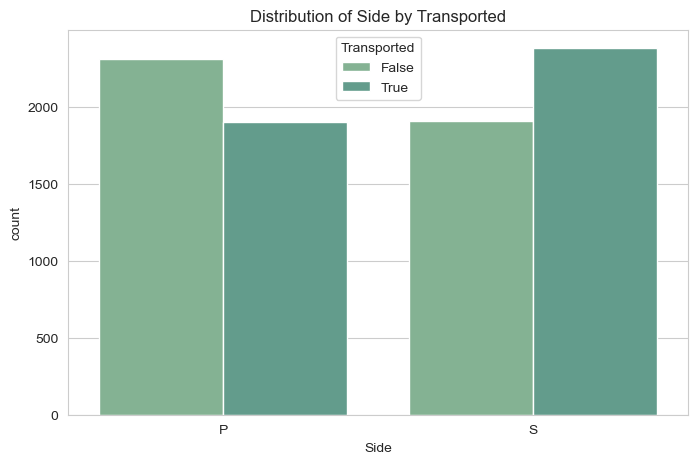

In [21]:
df[['Deck', 'Num', 'Side']] = df['Cabin'].str.split('/', expand=True)

plt.figure(figsize = (8, 5))

sns.countplot(data = df,
              x = 'Deck',
              hue = 'Transported')

plt.title("Distribution of Deck by Transported")
plt.show()

plt.figure(figsize = (8, 5))

sns.countplot(data = df,x = 'Side',
              hue = 'Transported')

plt.title("Distribution of Side by Transported")
plt.show()


## Distribution of Destination by Transported

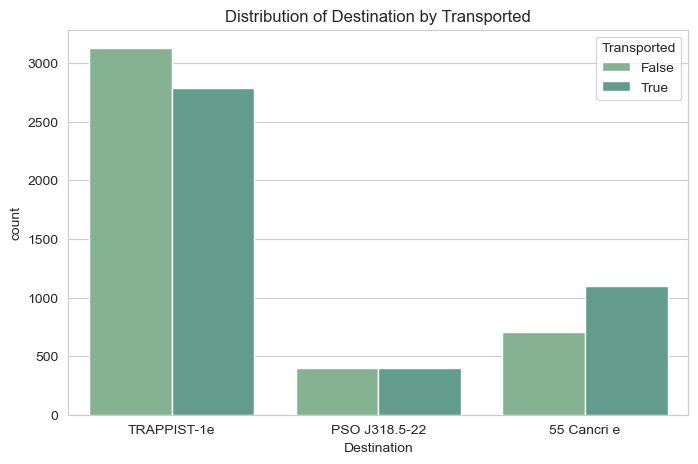

In [22]:
plt.figure(figsize = (8, 5))

sns.countplot(data = df,
              x = 'Destination',
              hue = 'Transported')
plt.title('Distribution of Destination by Transported')
plt.show()

## Distribution of VIP by Transported

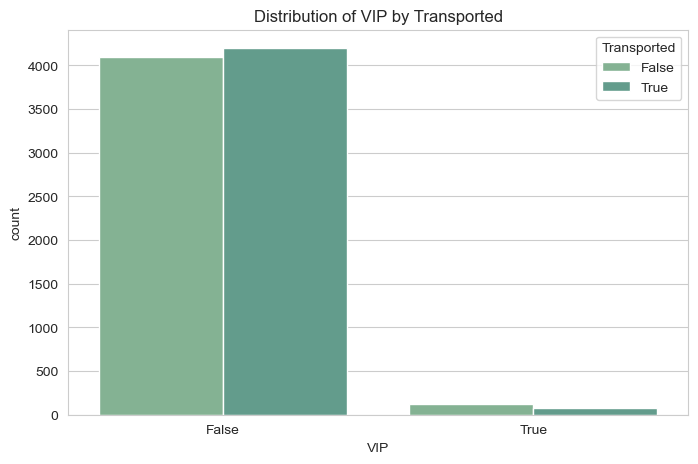

In [23]:
plt.figure(figsize = (8, 5))

sns.countplot(data = df,
              x = 'VIP',
              hue = "Transported")

plt.title("Distribution of VIP by Transported")
plt.show()

# Numerical Features Analysis

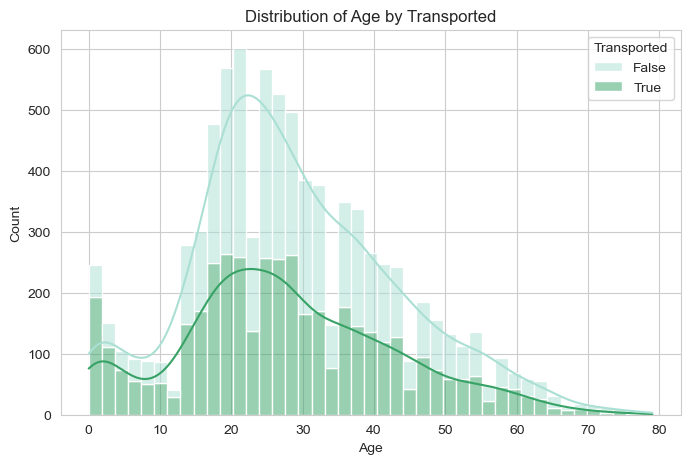

In [28]:
plt.figure(figsize=(8, 5))
sns.histplot(data = df,
             x='Age',
             hue='Transported',
             multiple='stack',
             kde=True,
             palette = 'BuGn')
plt.title("Distribution of Age by Transported")
plt.show()


## Correlation heatmap

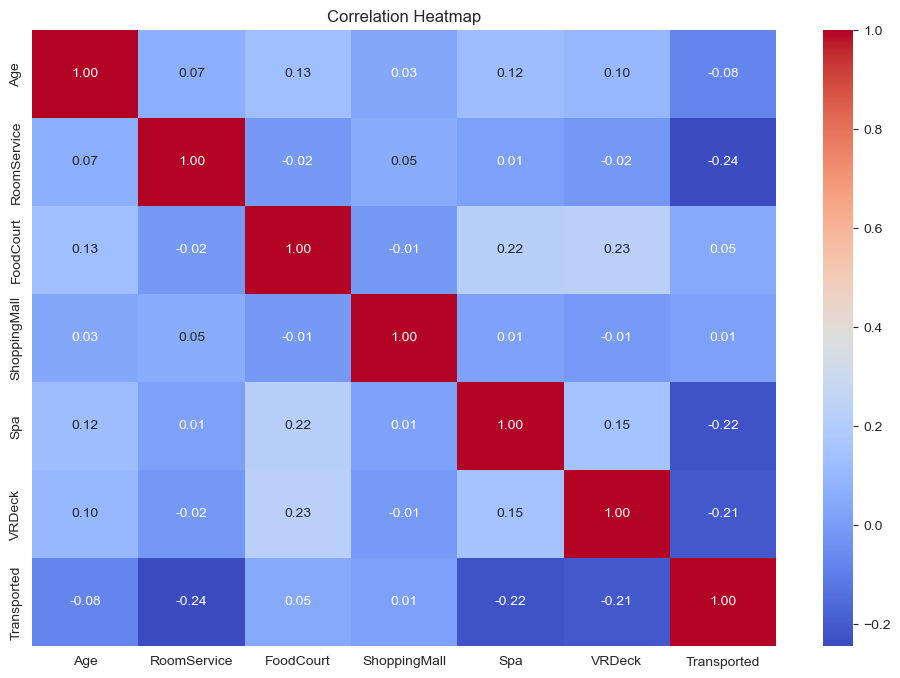

In [40]:
corr_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']
corr_matrix = df[corr_features].corr()

plt.figure(figsize = (12, 8))
sns.heatmap(corr_matrix,
            annot = True,
            cmap = 'coolwarm',
            fmt = '.2f')
plt.title('Correlation Heatmap')
plt.show()

# Data preprocessing

## Filling missing values

In [48]:
# Fill missing values for categorical features with mode
for feature in ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']:
    mode_value = df[feature].mode()[0]
    df[feature].fillna(mode_value, inplace=True)

# Split Cabin into Deck, Num, and Side
df[['Deck', 'Num', 'Side']] = df['Cabin'].str.split('/', expand=True)

# Fill missing values for Deck and Side with 'Unknown', and Num with median
df['Deck'].fillna('Unknown', inplace=True)
df['Side'].fillna('Unknown', inplace=True)
df['Num'].fillna(df['Num'].median(), inplace=True)

# Fill missing values for Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing values for spending features with 0
for feature in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    df[feature].fillna(0, inplace=True)

# Check the dataset for any remaining missing values
missing_values_after_filling = df.isnull().sum()
missing_values_after_filling


PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
Deck              0
Num               0
Side              0
dtype: int64

## One-Hot Encoding

In [49]:
# One-hot encoding categorical variables
categorical_features_to_encode = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']
data_encoded = pd.get_dummies(df, columns=categorical_features_to_encode)

# Display the first few rows of the encoded dataset
data_encoded.head()


,PassengerId,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Num,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_Unknown,Side_P,Side_S,Side_Unknown
0,0001_01,B/0/P,39.0,0.0,0.0,0.0,0.0,0.0,False,0,...,False,False,False,False,False,False,False,True,False,False
1,0002_01,F/0/S,24.0,109.0,9.0,25.0,549.0,44.0,True,0,...,False,False,False,True,False,False,False,False,True,False
2,0003_01,A/0/S,58.0,43.0,3576.0,0.0,6715.0,49.0,False,0,...,False,False,False,False,False,False,False,False,True,False
3,0003_02,A/0/S,33.0,0.0,1283.0,371.0,3329.0,193.0,False,0,...,False,False,False,False,False,False,False,False,True,False
4,0004_01,F/1/S,16.0,303.0,70.0,151.0,565.0,2.0,True,1,...,False,False,False,True,False,False,False,False,True,False


## Standardization

In [51]:
# Selecting numerical features for standardization
numerical_features_to_scale = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Num']

# Standardizing the numerical features
scaler = StandardScaler()
data_encoded[numerical_features_to_scale] = scaler.fit_transform(data_encoded[numerical_features_to_scale])

# Display the first few rows of the scaled dataset
data_encoded.head()

,PassengerId,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Num,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_Unknown,Side_P,Side_S,Side_Unknown
0,0001_01,B/0/P,0.711945,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,False,-1.177238,...,False,False,False,False,False,False,False,True,False,False
1,0002_01,F/0/S,-0.334037,-0.168073,-0.275387,-0.241771,0.217158,-0.224205,True,-1.177238,...,False,False,False,True,False,False,False,False,True,False
2,0003_01,A/0/S,2.036857,-0.268001,1.959998,-0.283579,5.695623,-0.219796,False,-1.177238,...,False,False,False,False,False,False,False,False,True,False
3,0003_02,A/0/S,0.293552,-0.333105,0.523010,0.336851,2.687176,-0.092818,False,-1.177238,...,False,False,False,False,False,False,False,False,True,False
4,0004_01,F/1/S,-0.891895,0.125652,-0.237159,-0.031059,0.231374,-0.261240,True,-1.175264,...,False,False,False,True,False,False,False,False,True,False


# Machine Learning

## Splitting the dataset

In [54]:
data_encoded.drop(columns='Cabin', inplace=True, errors='ignore')


In [55]:
# Assuming 'Transported' is the target variable
X = data_encoded.drop('Transported', axis=1)
y = data_encoded['Transported']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Random Forest Classifier Training

In [57]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Random Forest Classifier Evaluation

In [59]:
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7941345600920069


## Fine-Tuning the model

In [62]:
param_grid = {
    'n_estimators' : [50, 100, 200],
    'max_depth' : [None, 10, 20, 30],
    'min_samples_split' : [2, 5 ,10],
    'min_samples_leaf' : [1, 2, 4],
    'max_features' : ['auto', 'sqrt']
}

grid_search = GridSearchCV(estimator = RandomForestClassifier(random_state=42),
                                                              param_grid = param_grid,
                                                              cv = 5,
                                                              verbose = 2,
                                                              n_jobs = -1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n

/Users/matthieukhairallah/anaconda3/envs/venv1/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
415 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/matthieukhairallah/anaconda3/envs/venv1/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/matthieukhairallah/anaconda3/envs/venv1/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/matthieukhairallah/anaconda3/envs/venv1/lib/python3.11/site-packages

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [63]:
best_params = grid_search.best_params_

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

best_params, accuracy

({'max_depth': 20,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 5,
  'n_estimators': 200},
 0.7958596894767107)

## Gradient Boosting Classifier Training

In [69]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model on the training data
gb_model.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [70]:
y_pred_gb = gb_model.predict(X_test)

accuracy_gb = accuracy_score(y_test, y_pred_gb)

print(accuracy_gb)

0.79700977573318
